## Bibliotecas

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Distribuições de Probabilidade

Dado um experimento e um espaço amostral associado a este exprimento, uma função que associe o resultado obtido de um experimento a um número real é chamado de variável aleatória (v.a.). Podemos mensurar a probabilidade associada a uma variável aleatória por meio de uma função de probabilidade, a coleção de todas as probabilidades atribuídas aos possíveis valores dessa variável define a distribuição de probabilidades. 

## Distribuição de Variáveis Aleatórias Discretas

Variáveis aleatórias discretas são variáveis que podem assumir apenas números contáveis, por exemplo, podemos pensar no número de pares de sapato em uma loja ou de peças defeituosas em uma linha de produção. Há inúmeras maneiras em como estas variáveis podem estar distribuídas, por exemplo, ao lançar uma moeda você tem igual probabilidade de obter 'cara' ou 'coroa', já ao retirar duas cartas de um baralho sequenciamente, a probabilidade da carta seguinte depende da carta retirada anteriormente. 

Alguns métodos comuns utilizados na biblioteca scipy.stats são os seguintes: 

- cdf(x, loc=0, scale=1): Cumulative distribution function.
- pdf(x, loc=0, scale=1): Probability density function.
- rvs(loc=0, scale=1, size=1, random_state=None): Random variates.

### Distribuição Uniforme

Uma variável aleatória (v.a) segue uma distribuição uniforme quando todos os seus valores possíveis têm a mesma probabilidade de ocorrer. Por exemplo, ao lançar um dado justo de 6 faces, cada número de 1 a 6 tem a mesma probabilidade de ocorrência. 

In [92]:
from scipy.stats import uniform

# Probabilidade de ao lançar um dado de 6 faces obter uma face qualquer
round(uniform.cdf(1,0,6),4)

0.1667

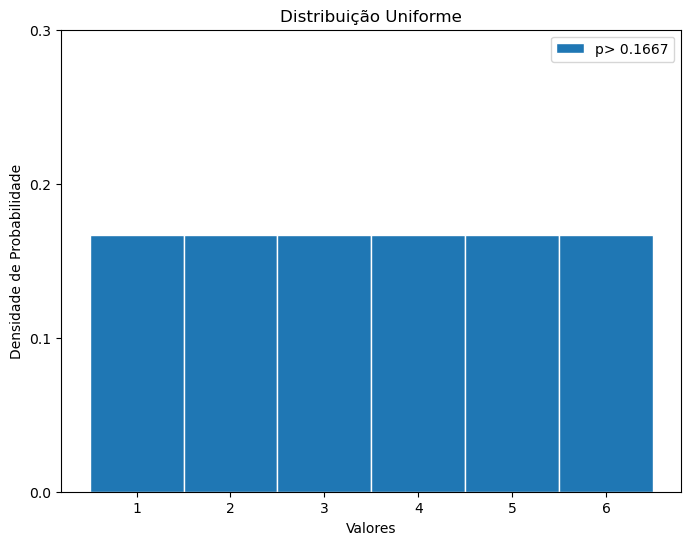

In [218]:
from scipy.stats import randint

plt.figure(figsize=(8, 6))
plt.bar(np.arange(1, 7), randint.pmf(np.arange(1, 7), 1, 7), width=1, edgecolor='white', label = f'p> {round(uniform.cdf(1,0,6),4)}')
plt.title('Distribuição Uniforme')
plt.xlabel('Valores')
plt.ylabel('Densidade de Probabilidade')
plt.yticks(np.arange(0, 0.6, 0.1))
plt.legend()
plt.ylim(0, 0.3)
plt.show()

### Distribuição Bernoulli

Quando a variável aleatória (v.a) pode assumir apenas dois resultados possíveis: sucesso (X=1) ou fracasso (X=0). Peguemos como exemplo o lançamento de uma moeda, há apenas dois resultados possíveis que é cara (K) ou coroa (C), a probabilidade associada ao evento K é de 0.5 e a de C é a diferença.

In [112]:
from scipy.stats import bernoulli

p = 0.5 # Probabilidade de sucesso
x = 1 # x = {0, 1}

bernoulli.pmf(x, p)

0.5

(0.0, 1.0)

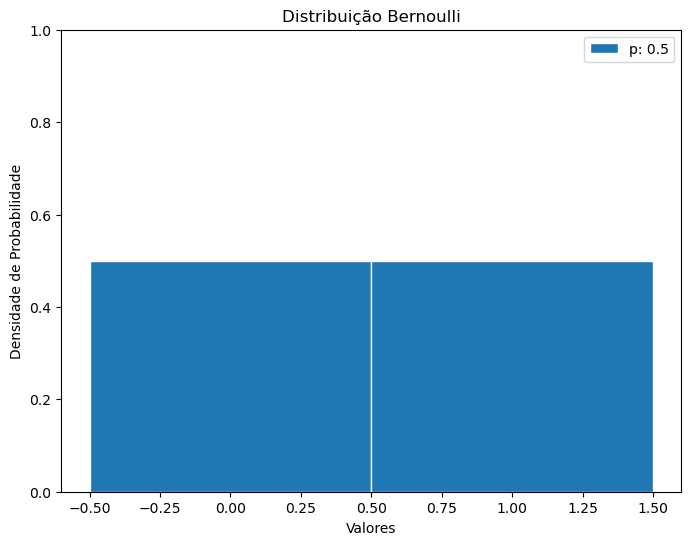

In [67]:
from scipy.stats import bernoulli

plt.figure(figsize=(8, 6))
plt.bar([0, 1], bernoulli.pmf([0, 1], 0.5), width=1, edgecolor='white', label = 'p: 0.5')
plt.title('Distribuição Bernoulli')
plt.xlabel('Valores')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.ylim(0, 1)

### Distribuição Geométrica

É baseada na distribuição de Bernoulli, onde a variável aleatória (v.a) pode assumir apenas dois resultados possíveis e o objetivo é mensurar a probabilidade de obter um determinado resultado após N tentativas. Por exemplo, a probabilidade de obter 'cara' (K) em um único lançamento é 0.5, mas a probabilidade de obter 'cara' em dois lançamentos consecutivos é 0.25 e assim em diante. 

In [116]:
from scipy.stats import geom

p = 0.50 # Probabilidade de sucesso/fracasso
x = 2 # Lançamento/Tentativa

geom.pmf(x, p)

0.25

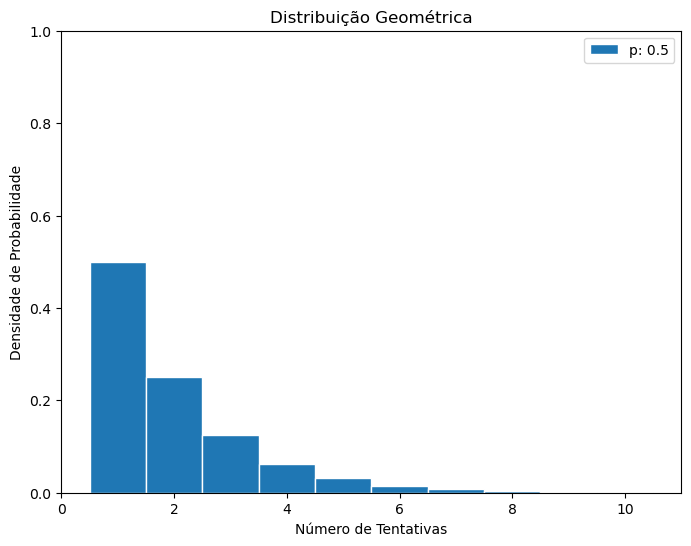

In [174]:
from scipy.stats import geom

# Parâmetros da distribuição
p = 0.50
x = np.arange(1, 11)  # lançamentos possíveis (1, 2, ..., 10)

plt.figure(figsize=(8, 6))
plt.bar(x, geom.pmf(x, p), width=1, edgecolor='white', label=f'p: {p}')
plt.title('Distribuição Geométrica')
plt.xlabel('Número de Tentativas')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.ylim(0, 1)
plt.show()

### Distribuição Hipergeométrica

É utilizada para calcular a probabilidade de obter um determinado número de sucessos após N retiradas de uma amostra sem reposição, ou seja, a cada retirada o número de elementos restantes na amostra diminui afetando as probabilidades subsequentes. Por exemplo, um baralho tem 52 cartas e contém quatro As, a probabilidade obter um A em uma retirada é de 7,7%, já a probabilidade de obter um A novamente após uma retirada bem sucedida é significativamente menor. 

In [157]:
from scipy.stats import hypergeom

N = 52  # tamanho da população
K = 4   # número de sucessos na população
n = 5  # retiradas
x = 1

round(hypergeom.pmf(x, N, K, n),4)

0.2995

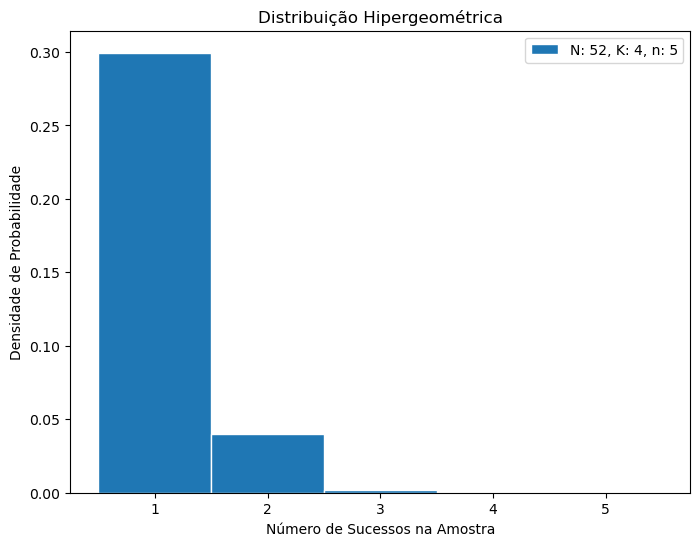

In [149]:
N = 52  # tamanho da população
K = 4   # número de sucessos na população
n = 5  # retiradas
x = np.arange(1, n+1)  # valores possíveis de sucessos na amostra

plt.figure(figsize=(8, 6))
plt.bar(x, hypergeom.pmf(x, N, K, n), width=1, edgecolor='white', label=f'N: {N}, K: {K}, n: {n}')
plt.title('Distribuição Hipergeométrica')
plt.xlabel('Número de Sucessos na Amostra')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.show()

### Distribuição Binomial

É uma generalização do modelo de bernoulli onde mensura-se a probabilidade de obter sucessos em um dado número de eventos independentes, por exemplo, ao lançar uma moeda uma única vez, a probabilidade de obter 'cara' (K) ou 'coroa' (C) é de 0.5, ao lançar duas vezes a probabilidade de obter KK é de 0.25, CC é de 0.25 e KC ou CK é de 0.5. 

In [176]:
from scipy.stats import binom

n = 10   # Lançamentos
p = 0.5  # Probabilidade de sucesso
k = 5   # Número de sucessos

round(binom.pmf(k, n, p),2)

0.25

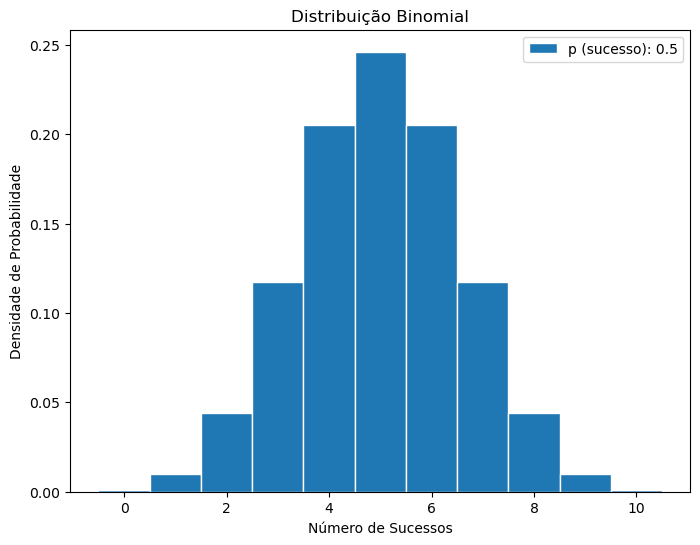

In [208]:
plt.figure(figsize=(8, 6))
plt.bar(np.arange(0, 10+1), binom.pmf(np.arange(0, n+1), 10, 0.5), width=1, edgecolor='white', label=f"p (sucesso): {p}")
plt.title('Distribuição Binomial')
plt.xlabel('Número de Sucessos')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.show()

### Distribuição de Poisson

É uma generalização da distribuição binomial quando o tamanho de observações é muito grande e a probabilidade de sucesso é muito pequena. É muito utilizado quando busca-se calcular a probabilidade de um determinado evento raro em um intervalo de tempo ou espaço. 

In [184]:
from scipy.stats import poisson

# João atende 30 ligações em um dia, qual a probabilidade dele atender exatamente 35 ligações? 

mu = 30 # Media de ocorrência
k = 35  # Eventos

poisson.pmf(k, mu)

0.045308200086552224

In [192]:
# João quer saber agora qual a probabilidade de atender até 35 ligações? 

poisson.cdf(k, mu)

0.8426165255696685

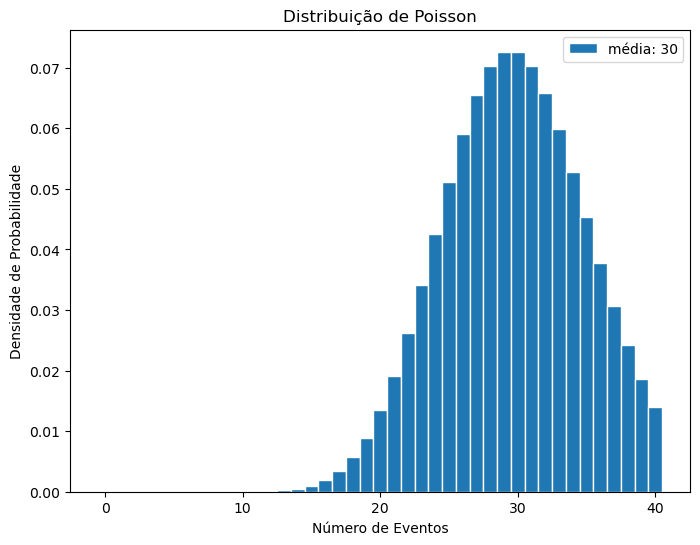

In [204]:
# João pode não atender nenhuma ligação e atender até 5 ligações por hora (40 ligações em 8 horas de trabalho)

mu = 30 # Media de ocorrência
K = np.arange(0, 41)  # Eventos possíveis (0, 1, ..., 40)

# Gráfico da Distribuição de Poisson
plt.figure(figsize=(8, 6))
plt.bar(K, poisson.pmf(K, mu), width=1, edgecolor='white', label=f'Média: {mu}')
plt.title('Distribuição de Poisson')
plt.xlabel('Número de Eventos')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.show()

## Bibliografia

- Probabilidade: Aplicações à Estatística, Paul L. Meyer
- Estatística Básica, Pedro A. Morettin e Wilton de O. Bussab